In [40]:
from pylab import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader.data as web
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date, timedelta
import time


In [41]:
#time which we want to analyze
Y=7. # number of years
dY=52. # intervals of years (supposing equal onboarding probability throughout the year)

#Average € per investors
T=10000 #€ annual NFT cost per company
tokenscale=1000000 #resize € scale

In [42]:
#stuff needed for the program to run

S=int(Y*dY) # number of steps
Years=[0]*S
rev=[0]*S #Total revenue
revtot=[0]*S
for t in range(0,S):
    Years[t]=t/dY #+2022
ly=range(0,int(Y+1)) #Years shown

In [43]:
#N[1-e^(-t*R)]  where N is the total number of companies and R is the probability they join
def model(ind):
    Delay=1+int(ind[2]*dY) #introduce delay
    #clean new arrays
    Inv=[0]*S #new investors
    N=[0]*S #Number of total companies remaining
    rev=[0]*S
    #initialize them
    N[Delay-1]=ind[0]*ind[1] # the possible investors are the percentage on the total companies
    Inv[0]=0
    #global rev
    R=ind[1]/5  #we assume investors decide in the first 5 years equally distributed 
    #every week for the period we want to analise
    for t in range(Delay,S):
        #R=R+(randn()/500)     ## uncomment to add fluctuations
        Inv[t]=round(N[t-1]*R)   #a client either onboards or don't
        N[t]=(N[t-1] - Inv[t])
        rev[t] = Inv[t]*(T/tokenscale) +rev[t-1] #+rev[t-1]  # new clients need an NFT
        if t-(3*dY) > 0:
                R = ind[1]*4.5 
        for n in range(1,int(Y)): #for every year 
            if t-n*dY > 0:  #if more than one/two/etc year has passed
                for i in range(1,n):
                    rev[t] = Inv[int(t-i*dY)]*(T/tokenscale)  +rev[t-1]#we need to add one NFT for the new clients from 1/2/etc years before        
        #print(t,R)
        revtot[t]= revtot[t] +rev[t]
        #R=R + InvTot[t]/10000
        #R=R + N[t]/(1000000)     
    return rev #number of total investors per period of time

In [44]:
def show(array):  #plots
    Chain=model(array)  #calling this refills rev and updates revtot
    return plot(Years, Chain, label=array[3], color=array[4],linewidth=2), scatter(x=int(array[2]*dY)/dY, y = rev[int(array[2]*dY)], color=array[4],s=500,), text(int(array[2]*dY)/dY -0.1,  rev[ int(array[2]*dY)] +1.5,array[3],fontsize=14)

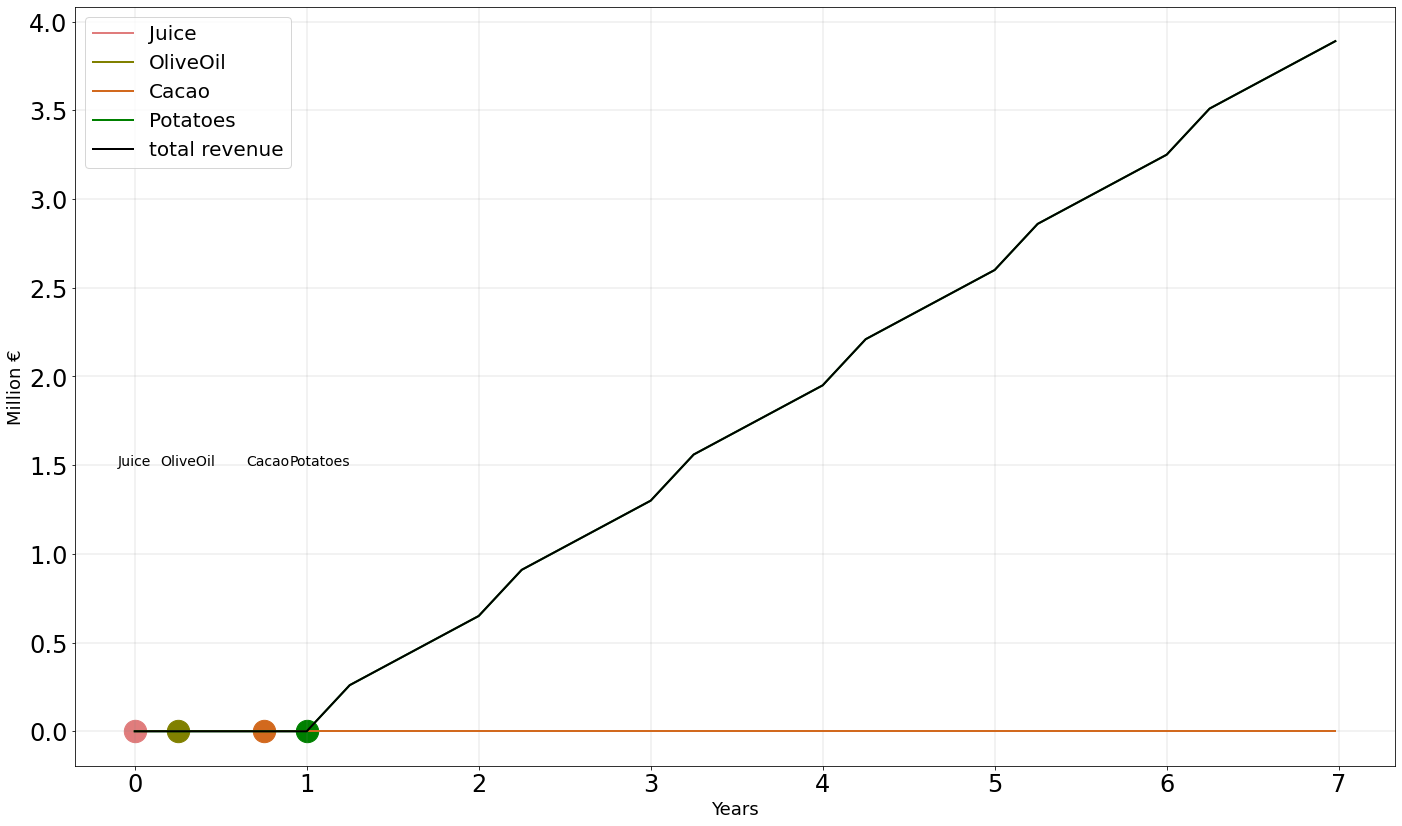

In [46]:
fig=figure(figsize=(20,12))
grid(color='grey', linestyle='-', linewidth=0.2)

Juice        =     [   5000    ,   1/100  ,   0.    ,  'Juice'     ,  '#e07c7c'  ]
OliveOil     =     [   1000    ,   1/100  ,   0.25  ,  'OliveOil'  ,  'olive'    ]
Fish         =     [   15000   ,   1/100  ,   0.50  ,  'Fish'      ,  'violet'   ]
Cacao        =     [   2000    ,   1/100  ,   0.75  ,  'Cacao'     ,  'chocolate']
Floriculture =     [   3000    ,   1/10  ,   1.25  ,  'Flowers'   ,  '#6204ff'  ]
Horticulture =     [   1000    ,   1/10  ,   1.    ,  'Potatoes'       ,  'green'    ]



#reset total revenue
revtot=[0]*S

show(Juice)
show(OliveOil)
#show(Fish)
show(Cacao)
show(Horticulture)
#show(Floriculture)

#total revenue plot
plot(Years, revtot, label='total revenue', color='black',linewidth=2)

rc('font', size=24)
xlabel("Years",fontsize=18)
ylabel("Million €",fontsize=18)
YearsShown=ly
xticks(YearsShown)
legend(frameon=True,fontsize=20)
tight_layout()

In [9]:
fig=figure(figsize=(20,12))

OFC Token value if value is backed up by money
OFCN= 10000000 #number of tokens
OFCHOLD=0 #number of token to store
OFCVALUE=[0]*S
for t in range(0,S):
    OFCVALUE[t]=revtot[t]*tokenscale/OFCN   # value of each token
    
    
    
    
    

plot(Years, OFCVALUE, label='OFC value', color='black',linewidth=2)
grid(color='grey', linestyle='-', linewidth=0.2)
rc('font', size=12)
xlabel("Years",fontsize=18)
ylabel("€ per token",fontsize=18)
YearsShown=ly
xticks(YearsShown)
legend(frameon=True,fontsize=20)
tight_layout()

In [2]:
#import requests
#from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
#import json
#import os
#import pandas as pd

#import data from file
#file in sorted(os.listdir()):
#data=open(os.path.join(file))
#column=np.loadtxt(data)

#money=column[:, 6]
#data.close()



#all this is based on the number of onboardings
#we are the ones that always buy and sell




#OFCTOT=200000000  #ofctoken limit 200 millions

#OFCVALUE=[0]*S
#OFCNUMBER=[0]*S
#OFCHOLD=[0]*S


#OFCVALUE[0]=0.18  #initial selling value in euro 
#OFCNUMBER[0]=1000000  #initial tokens in circulation 1 million
#OFCHOLD[0]= OFCTOT - OFCNUMBER[0]

#def Privateround():
    
    
#    return VALUE


import numpy as np
import scipy
from scipy import optimize


#s = P**a + P + 1
#d = 1/(0.5*P**2 + P)



a = np.linspace(0.2, 2.0, num=1000)
z = 0.5  

def f(P):
    return 1/(z * P**2 + P) - (P**a + P + 1)

res = []
for a in a:
    res.append({'a': a, 'res': optimize.newton(f, 1e-8)})

print(res)


#def MarketMakers(T): #, OFCVALUE):
#    value of tokens 
#    market capitalization=number of tokens* value of tokens
    
#    return VALUE



#Description of Token Use	Total Supply	Percent of Tot supply	Price per token	Valuation	Collected USD
#Seed Round	8,000,000.00	4.00%	0.060	$12,000,000.00	$480,000.00
#Private Round	13,000,000.00	6.50%	0.120	$24,000,000.00	$1,560,000.00
#Public round	5,000,000.00	2.50%	0.180	$36,000,000.00	$900,000.00
#Exchanges & Liquidity	24,000,000.00	12.00%		$0.00	$0.00

[{'a': 0.2, 'res': 0.00010002999768233757}, {'a': 0.20180180180180182, 'res': 0.0001000299976875557}, {'a': 0.2036036036036036, 'res': 0.00010002999769268795}, {'a': 0.20540540540540542, 'res': 0.00010002999769773575}, {'a': 0.20720720720720723, 'res': 0.00010002999770270046}, {'a': 0.209009009009009, 'res': 0.00010002999770758347}, {'a': 0.21081081081081082, 'res': 0.00010002999771238612}, {'a': 0.21261261261261263, 'res': 0.00010002999771710972}, {'a': 0.21441441441441442, 'res': 0.00010002999772175558}, {'a': 0.21621621621621623, 'res': 0.000100029997726325}, {'a': 0.21801801801801804, 'res': 0.00010002999773081921}, {'a': 0.21981981981981982, 'res': 0.00010002999773523945}, {'a': 0.22162162162162163, 'res': 0.00010002999773958694}, {'a': 0.22342342342342345, 'res': 0.00010002999774386289}, {'a': 0.22522522522522523, 'res': 0.00010002999774806846}, {'a': 0.22702702702702704, 'res': 0.00010002999775220485}, {'a': 0.22882882882882885, 'res': 0.00010002999775627312}, {'a': 0.2306306306